In [2]:
from sandpile import *
import multiprocessing as mp

## 2D grid comparisons

In [3]:
params = [
    (20, "open", "conservative"),
    # (20, "open", "non conservative"),
    # (20, "closed", "conservative"),
    # (20, "closed", "non conservative"),
    # (5, "open", "conservative"),
    # (10, "open", "conservative"),
    # (40, "open", "conservative"),
    # (5, "closed", "non conservative"),
    # (10, "closed", "non conservative"),
    # (40, "closed", "non conservative"),
    # (5, "open", "non conservative"),
    # (10, "open", "non conservative"),
    # (40, "open", "non conservative"),
]


def worker(func, args):
    return func(*args)


for grid, b, p in params:
    system = SandpileND(2, grid, 7, b, p)
    system.run_multiple_samples("./data", 100_000, 5, step=5, clear=True, desc=f"{grid} {b}, {p}")
    



d2_g20_c7_op_co:   0%|          | 0/5 [00:00<?, ?it/s]

Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Process ForkPoolWorker-9:
Process ForkPoolWorker-10:
Process ForkPoolWorker-6:


KeyboardInterrupt: 

# ND closed conservative simulations
    

In [ ]:
def worker(func, args):
    return func(*args)


params = [
    # (1, 20),
    # (2, 40),
    # (3, 20),
    # (4, 12),
    # (5, 10),
    # (6, 10)
]

tasks = []
for dim, grid in params:
    system = SandpileND(dim, grid, 7, "closed", "non conservative")
    x = run_multiple_samples(system, "./data", 1_000_000, 25, step=50, run=False, desc=f"dim {dim}, grid {grid}",
                             clear=False)
    tasks.extend(x)

with mp.Pool(mp.cpu_count() - 2) as pool:
    pool.starmap(worker, tasks)



# Visualisation

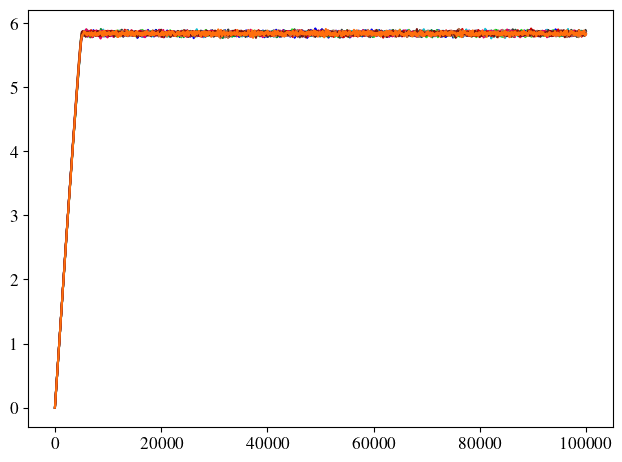

In [5]:

from analysis import *


dim, grid = 2, 40

plt.figure("visualisation")
for i in range(10):
    data_dir = pathlib.Path(f"./data/d{dim}_g{grid}_c7_cl_nco/data_{i}.slopes.npy").resolve().absolute()

    step, slope = load_slope_values(data_dir.__str__())
    draw_slope(slope, step)

